In [36]:
############################Initialization############################
RANDOM_SEED = 1 # seed value for random number generator             
import numpy as np
from scipy import stats as st
import pandas as pd
import seaborn as sns
from matplotlib import rc
import os #manage files
import matplotlib.pyplot as plt  #plots
from matplotlib import rc
import sklearn 
from sklearn.model_selection import train_test_split
import itertools
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score # evaluation metrics
from sklearn.preprocessing import StandardScaler # used for variable scaling data
from sklearn.preprocessing import MinMaxScaler as Scaler # used for variable scaling data
from sklearn.ensemble import RandomForestRegressor # Random Forest package
from sklearn.ensemble import ExtraTreesRegressor # Extra Trees package
from sklearn.ensemble import GradientBoostingRegressor # Gradient Boosting package
from sklearn.model_selection import KFold
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet # modeling package
os.chdir('C:\\Users\Jimmy\Documents\Grad School\Python\Week 3')
#####################################################################

In [37]:
mydata=pd.read_csv('boston.csv')
mydata.head()
##sns.pairplot(mydata, hue='neighborhood')

,neighborhood,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
0,Nahant,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,Swampscott,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,Swanpscott,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,Marblehead,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,Marblehead,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [38]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [39]:
mydata=mydata.drop('neighborhood', 1)
mydata.head()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [40]:
mydata.describe(include="all")

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.528854
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.182176
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


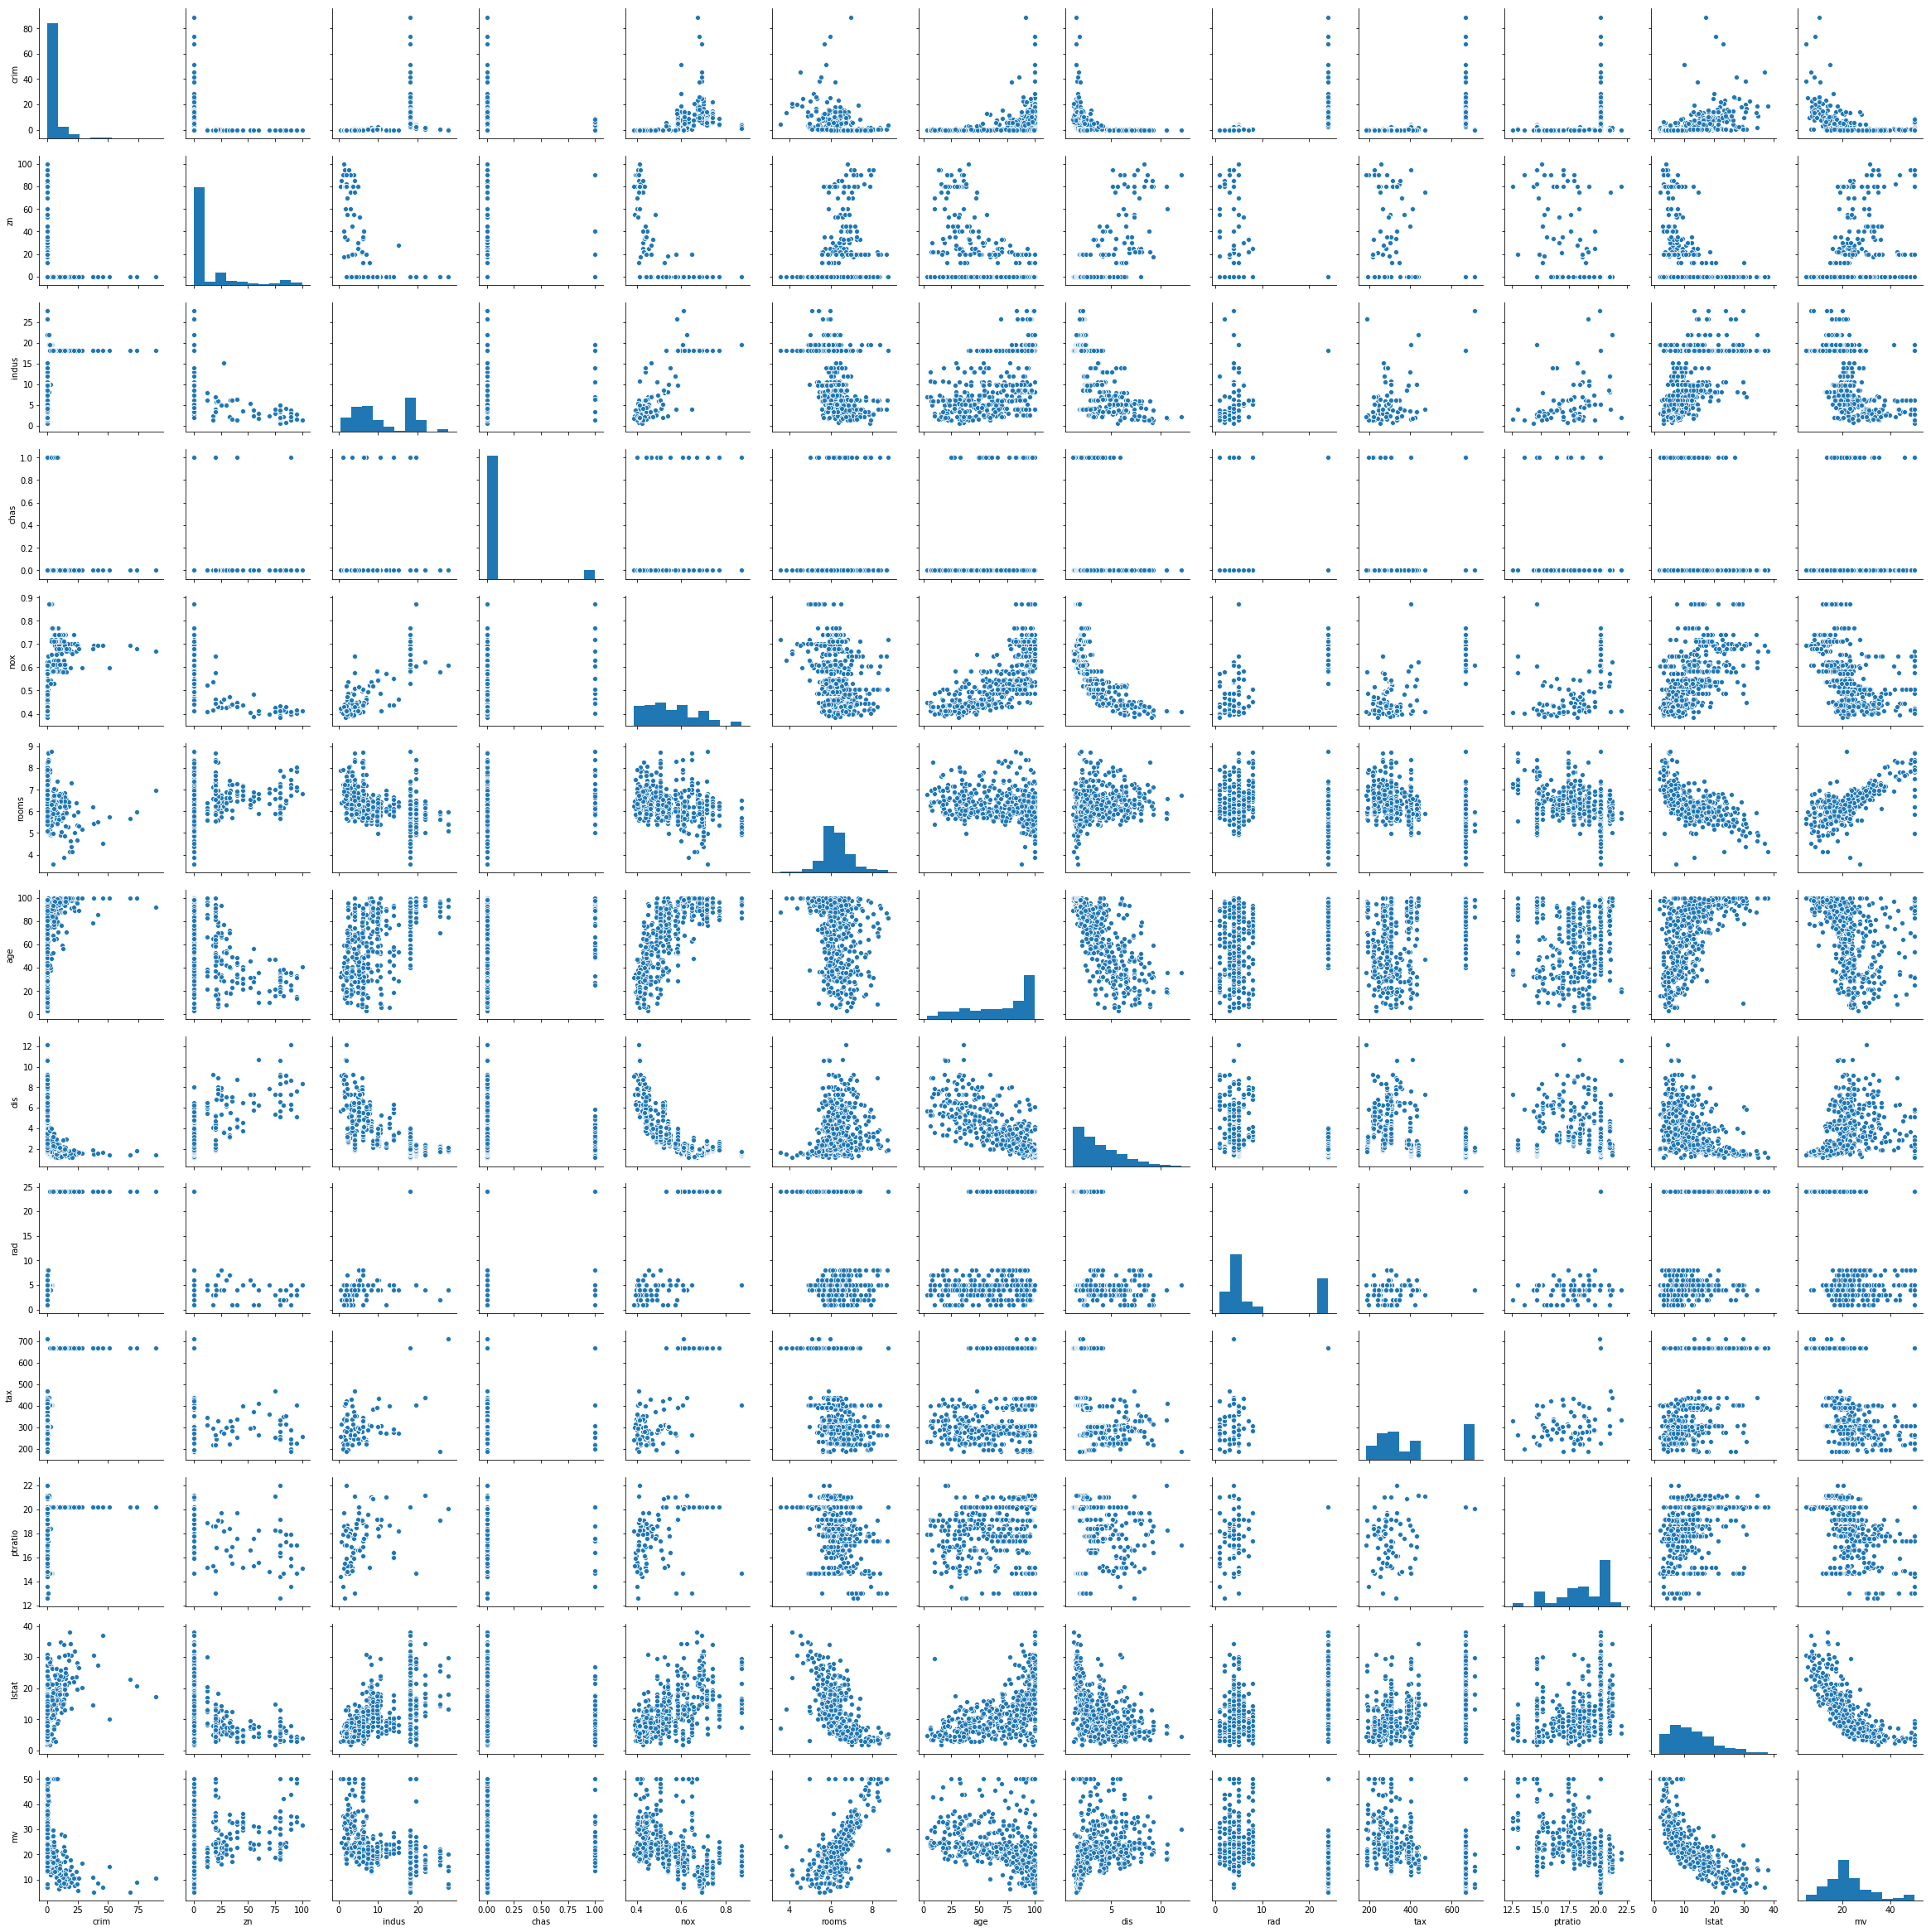

In [6]:
sns.pairplot(mydata, diag_kind='hist')

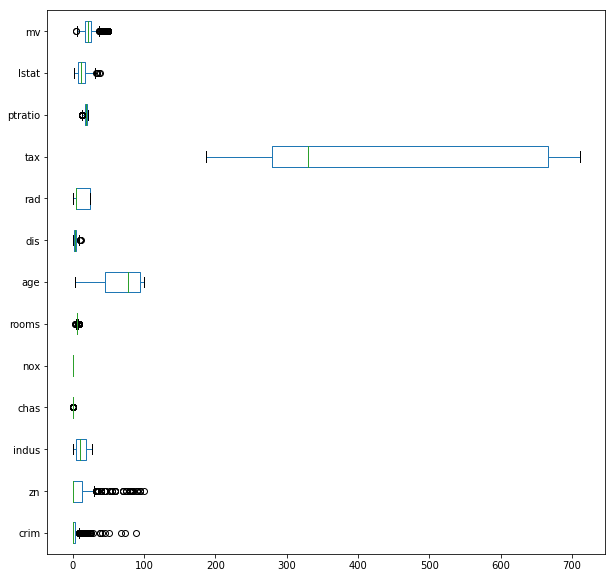

In [7]:
mydata.boxplot(vert=False, figsize=(10,10), grid=False)

In [41]:
mydata['lnmv'] = np.log(mydata['mv'])

In [42]:
mydataln = mydata
mydataln = mydataln.drop('mv',1)

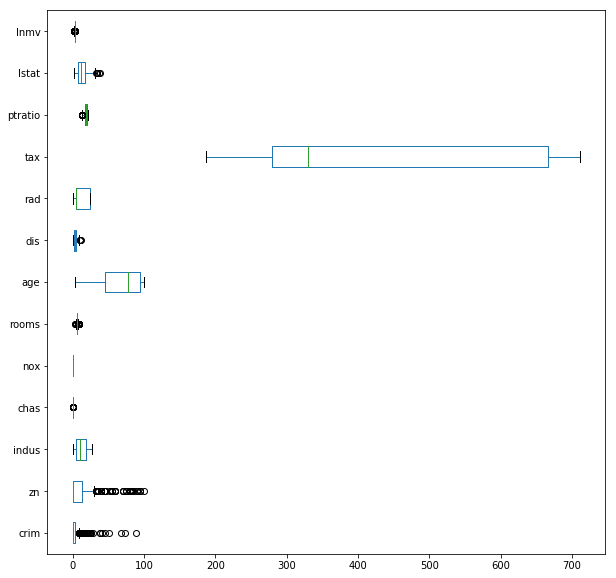

In [44]:
mydataln.boxplot(vert=False, figsize=(10,10), grid=False)

In [45]:
mydata2=mydataln.apply(lambda x: x+.01)

In [46]:
mydata2.head()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,lnmv
0,0.01632,18.01,2.32,0.01,0.548,6.585,65.21,4.1000,1.01,296.01,15.31,4.99,3.188054
1,0.03731,0.01,7.08,0.01,0.479,6.431,78.91,4.9771,2.01,242.01,17.81,9.15,3.082693
2,0.03729,0.01,7.08,0.01,0.479,7.195,61.11,4.9771,2.01,242.01,17.81,4.04,3.556740
3,0.04237,0.01,2.19,0.01,0.468,7.008,45.81,6.0722,3.01,222.01,18.71,2.95,3.518556
4,0.07905,0.01,2.19,0.01,0.468,7.157,54.21,6.0722,3.01,222.01,18.71,5.34,3.599059


In [47]:
mydata3 = mydata2.transform(lambda x: st.boxcox(x)[0])

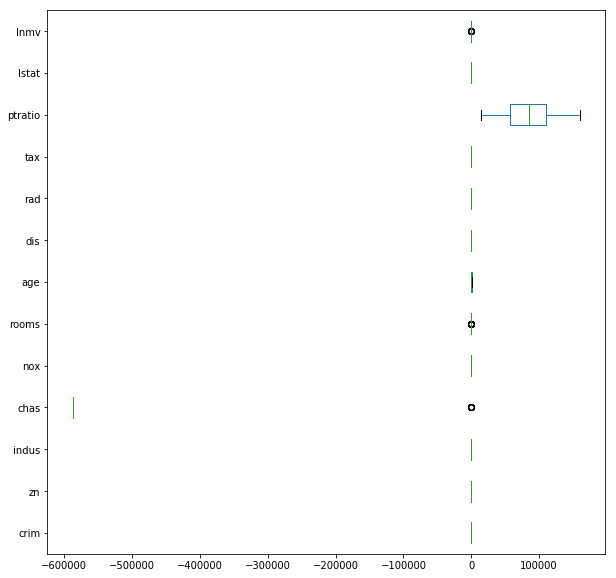

In [48]:
mydata3.boxplot(vert=False, figsize=(10,10), grid=False)

In [49]:
mydata4 = mydata3.transform(lambda x: (x - x.min()) / (x.max() - x.min()))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022EEAD537F0>,
      dtype=object)

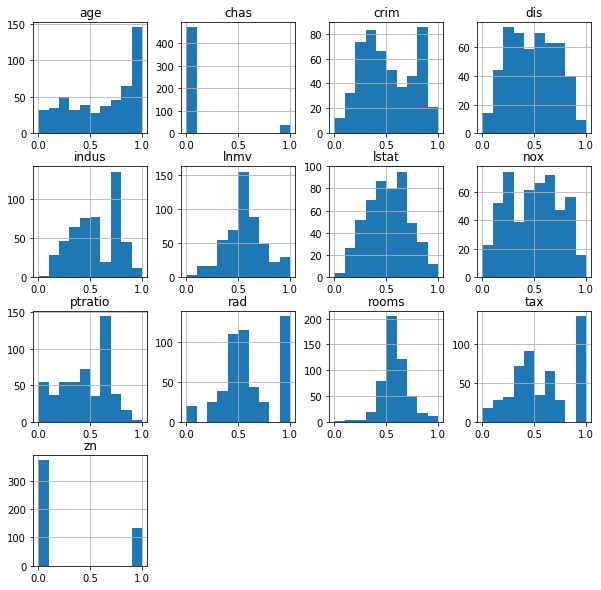

In [50]:
mydata4.hist(figsize=(10,10))

In [51]:
mydata4.describe(include="all")

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,lnmv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.518606,0.261061,0.562812,0.069170,0.490420,0.577607,0.625279,0.485270,0.625027,0.581265,0.461663,0.517794,0.560752
std,0.247164,0.435430,0.232825,0.253994,0.251621,0.129442,0.315506,0.229684,0.260145,0.280933,0.236275,0.200937,0.187448
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.319026,0.000000,0.378568,0.000000,0.249073,0.506588,0.337094,0.297601,0.491579,0.375989,0.298320,0.364902,0.460953
50%,0.476717,0.000000,0.559586,0.000000,0.500909,0.567485,0.707846,0.485207,0.562195,0.511675,0.489371,0.524193,0.561097
75%,0.771394,0.967068,0.796857,0.000000,0.678615,0.643218,0.920638,0.683853,1.000000,0.965644,0.659680,0.667866,0.639682
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
cols = mydata4.columns.tolist()
cols = cols[-1:] + cols[:-1]
mydata5=mydata4[cols]
mydata5.describe(include="all")

,lnmv,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.560752,0.518606,0.261061,0.562812,0.069170,0.490420,0.577607,0.625279,0.485270,0.625027,0.581265,0.461663,0.517794
std,0.187448,0.247164,0.435430,0.232825,0.253994,0.251621,0.129442,0.315506,0.229684,0.260145,0.280933,0.236275,0.200937
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.460953,0.319026,0.000000,0.378568,0.000000,0.249073,0.506588,0.337094,0.297601,0.491579,0.375989,0.298320,0.364902
50%,0.561097,0.476717,0.000000,0.559586,0.000000,0.500909,0.567485,0.707846,0.485207,0.562195,0.511675,0.489371,0.524193
75%,0.639682,0.771394,0.967068,0.796857,0.000000,0.678615,0.643218,0.920638,0.683853,1.000000,0.965644,0.659680,0.667866
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


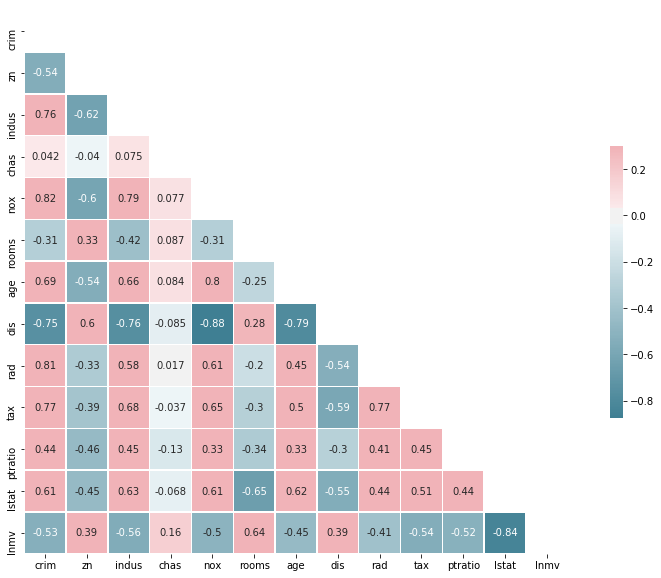

In [53]:
plt.figure(figsize=(15,10))
corr=mydata4.corr(method='pearson')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [54]:
model_data=mydata5.values

In [62]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    rmse = sqrt(mean_squared_error(test_labels, predictions))
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print('RMSE = {:0.4f}'.format(rmse))
    return accuracy

In [56]:
# Seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# The model input data outside of the modeling method calls
names = ['Linear_Regression', 'Ridge_Regression', 'Lasso_Regression', 'ElasticNet_Regression']

# Specify the set of regression models being evaluated (we set normalize=False because we have standardized above)
regressors = [LinearRegression(fit_intercept = True, normalize = False), 
              Ridge(alpha = 75, solver = 'cholesky', fit_intercept = True, normalize = False, random_state = RANDOM_SEED),
              Lasso(alpha = 0.01, max_iter=10000, tol=0.01, fit_intercept = True, normalize = False, random_state = RANDOM_SEED),
              ElasticNet(alpha = 0.01, l1_ratio = 0.5, max_iter=10000, tol=0.01, fit_intercept = True, normalize = False, random_state = RANDOM_SEED)]

In [57]:
# Establish number of cross folds employed for cross-validation
N_FOLDS = 10

# Setup numpy array for storing results
cv_results = np.zeros((N_FOLDS, len(names)))

# Initiate splitting process
kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)

# Check the splitting process by looking at fold observation counts
index_for_fold = 0  # Fold count initialized 
for train_index, test_index in kf.split(model_data):
    print('\nFold index:', index_for_fold, '---------------------------------------------------------------------------------------')

# The structure of modeling data for this study has the response variable coming first and explanatory variables later          
# so 1:model_data.shape[1] slices for explanatory variables and 0 is the index for the response variable    
    X_train = model_data[train_index, 1:model_data.shape[1]]
    X_test = model_data[test_index, 1:model_data.shape[1]]
    y_train = model_data[train_index, 0]
    y_test = model_data[test_index, 0]   

    index_for_method = 0  # Method count initialized
    for name, reg_model in zip(names, regressors):
        reg_model.fit(X_train, y_train)  # Fit on the train set for this fold
 
        # Evaluate on the test set for this fold
        y_test_predict = reg_model.predict(X_test)
        fold_method_result = sqrt(mean_squared_error(y_test, y_test_predict))
        cv_results[index_for_fold, index_for_method] = fold_method_result
        index_for_method += 1
  
    index_for_fold += 1

cv_results_df = pd.DataFrame(cv_results)
cv_results_df.columns = names

print('\n---------------------------------------------------------------------------------------')
print('Average results from ', N_FOLDS, '-fold cross-validation\n',
      'in standardized units (mean 0, standard deviation 1)\n',
      '\nMethod               Root mean-squared error', sep = '')    
print(cv_results_df.mean())


Fold index: 0 ---------------------------------------------------------------------------------------

Fold index: 1 ---------------------------------------------------------------------------------------

Fold index: 2 ---------------------------------------------------------------------------------------

Fold index: 3 ---------------------------------------------------------------------------------------

Fold index: 4 ---------------------------------------------------------------------------------------

Fold index: 5 ---------------------------------------------------------------------------------------

Fold index: 6 ---------------------------------------------------------------------------------------

Fold index: 7 ---------------------------------------------------------------------------------------

Fold index: 8 ---------------------------------------------------------------------------------------

Fold index: 9 ----------------------------------------------------------

In [113]:
y_train=y_train.astype(float)

from sklearn.linear_model import RidgeClassifierCV
ridge_model = sklearn.linear_model.RidgeClassifierCV( \
    alphas = [.01,.1,.5,1,10,30,70], \
    fit_intercept = True,\
    normalize = False, cv=3).fit(X_train,y_train1)

ValueError: Unknown label type: (array([0.61996402, 0.56986492, 0.8041781 , 0.78446556, 0.8261947 ,
       0.7076094 , 0.59751336, 0.58064886, 0.44706788, 0.50802872,
       0.40545942, 0.50802872, 0.57203717, 0.54316759, 0.49089106,
       0.53168317, 0.6016573 , 0.47324081, 0.53860025, 0.49089106,
       0.36370915, 0.524685  , 0.41118323, 0.39089564, 0.42246325,
       0.37291598, 0.44973855, 0.39967814, 0.49583842, 0.55666445,
       0.33515701, 0.39089564, 0.35119669, 0.34802495, 0.36060679,
       0.50802872, 0.53399777, 0.55666445, 0.62395873, 0.74310933,
       0.80715763, 0.66997329, 0.64547626, 0.63383301, 0.56109684,
       0.51760365, 0.53399777, 0.44973855, 0.387938  , 0.51997348,
       0.52702686, 0.54543827, 0.63968219, 0.60782079, 0.50802872,
       0.81454646, 0.63383301, 0.75612393, 0.60577322, 0.524685  ,
       0.50318267, 0.43352756, 0.58278276, 0.63968219, 0.77827566,
       0.60986151, 0.51997348, 0.57850741, 0.47067554, 0.55443594,
       0.62395873, 0.57203717, 0.59543074, 0.60782079, 0.62196464,
       0.56549683, 0.53399777, 0.55219914, 0.56109684, 0.54088828,
       0.6953149 , 0.61795684, 0.63578893, 0.59751336, 0.61795684,
       0.66997329, 0.58913972, 0.58278276, 0.61189543, 0.7076094 ,
       0.59124398, 0.57850741, 0.59751336, 0.63968219, 0.54770037,
       0.70236992, 0.56549683, 0.86129695, 0.92752506, 0.78137812,
       0.68638239, 0.66812298, 0.5007447 , 0.51760365, 0.53630344,
       0.5223339 , 0.5223339 , 0.54316759, 0.52935955, 0.51997348,
       0.57203717, 0.59543074, 0.50561065, 0.50318267, 0.49829665,
       0.49336992, 0.56109684, 0.51522435, 0.54316759, 0.51760365,
       0.57850741, 0.54088828, 0.54543827, 0.468099  , 0.50561065,
       0.56549683, 0.4252492 , 0.43898158, 0.48590188, 0.38496501,
       0.51522435, 0.524685  , 0.59958886, 0.49583842, 0.42246325,
       0.48840175, 0.47067554, 0.46291169, 0.35435077, 0.4808701 ,
       0.37595215, 0.387938  , 0.3574874 , 0.42246325, 0.30508103,
       0.36986354, 0.42246325, 0.3938381 , 0.4808701 , 0.41685077,
       0.56768483, 0.524685  , 0.41402396, 0.51997348, 0.46030071,
       0.42246325, 0.34802495, 0.89589649, 0.62594636, 0.60577322,
       0.67731981, 1.        , 1.        , 1.        , 0.59334097,
       0.63968219, 1.        , 0.61594305, 0.61594305, 0.58490916,
       0.47067554, 0.51283548, 0.6016573 , 0.61189543, 0.59124398,
       0.71966697, 0.60371873, 0.63187083, 0.72813984, 0.840465  ,
       0.87615984, 0.8261947 , 0.85026997, 0.7704527 , 0.66626713,
       0.72306984, 1.        , 0.76253225, 0.72645438, 0.80715763,
       0.77827566, 0.7381589 , 0.82907412, 0.74802125, 0.71452782,
       1.        , 0.78292371, 0.73483689, 0.80268313, 0.80715763,
       0.77671874, 0.62196464, 0.90873119, 0.98317548, 1.        ,
       0.59124398, 0.62792755, 0.58913972, 0.62792755, 0.53399777,
       0.57203717, 0.51760365, 0.58702813, 0.69708615, 0.61392259,
       0.63968219, 0.60577322, 0.7076094 , 0.56768483, 0.59958886,
       0.6718181 , 0.57203717, 0.68638239, 0.73149727, 0.9397631 ,
       1.        , 0.84608602, 0.75612393, 0.96240986, 0.75451167,
       0.62594636, 0.7577321 , 0.90106055, 0.98089988, 0.71280536,
       0.61996402, 0.64161962, 0.75451167, 0.61392259, 0.60577322,
       0.67731981, 0.53630344, 0.58278276, 0.61392259, 0.47579493,
       0.49829665, 0.62594636, 0.54543827, 0.62990236, 0.66253864,
       0.62792755, 0.63578893, 0.72306984, 0.91505564, 0.57635835,
       0.55443594, 0.92999088, 1.        , 0.82330234, 0.73149727,
       0.79059596, 0.91882132, 0.98657442, 0.74638819, 0.83050903,
       0.59543074, 0.7414635 , 1.        , 0.92380895, 0.54995397,
       0.55888473, 0.64355096, 0.62792755, 0.81160112, 0.76887649,
       0.76253225, 0.78137812, 0.77982878, 0.71452782, 0.81012338,
       0.94699865, 0.81454646, 0.95415602, 1.        , 0.7657123 ,
       0.57850741, 0.53630344, 0.60371873, 0.58490916, 0.63578893,
       0.7041213 , 0.84187484, 0.69353861, 0.61795684, 0.57203717,
       0.70586778, 0.67914293, 0.54088828, 0.58913972, 0.71280536,
       0.63578893, 0.57850741, 0.66626713, 0.77982878, 0.82475014,
       0.70236992, 0.78446556, 0.69885238, 0.59543074, 0.54088828,
       0.43626097, 0.58064886, 0.51997348, 0.56986492, 0.61594305,
       0.43898158, 0.4808701 , 0.52935955, 0.6016573 , 0.55666445,
       0.61594305, 0.6016573 , 0.54316759, 0.49829665, 0.63968219,
       0.63187083, 0.59958886, 0.58278276, 0.51760365, 0.59124398,
       0.52935955, 0.46291169, 0.51997348, 0.58278276, 0.54995397,
       0.55888473, 0.5223339 , 0.49829665, 0.54770037, 0.51043697,
       0.50318267, 0.77359343, 0.44706788, 0.61795684, 0.74965011,
       0.47324081, 0.46551109, 0.6016573 , 0.62990236, 0.66997329,
       0.59751336, 0.62196464, 0.5007447 , 0.73149727, 0.49089106,
       0.54770037, 0.4808701 , 0.57203717, 0.59334097, 0.59124398,
       0.63968219, 0.53168317, 0.55219914, 0.4550435 , 0.57635835,
       0.68638239, 0.57635835, 0.6016573 , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.36986354, 0.36986354,
       0.40545942, 0.37291598, 0.35435077, 0.34802495, 0.24724216,
       0.25481181, 0.27329302, 0.28764588, 0.32198845, 0.19109819,
       0.11884802, 0.25855793, 0.12843247, 0.24724216, 0.29468555,
       0.40832843, 0.60371873, 0.22784791, 0.36986354, 0.33515701,
       0.34802495, 0.32861125, 0.17827228, 0.        , 0.07342904,
       0.03517406, 0.11884802, 0.31528659, 0.16954874, 0.17827228,
       0.        , 0.30850361, 0.69353861, 0.46551109, 0.68638239,
       0.40545942, 0.46551109, 0.48339137, 0.44168951, 0.1090871 ,
       0.11884802, 0.13316062, 0.25481181, 0.19109819, 0.1739282 ,
       0.45239706, 0.38197649, 0.55219914, 0.3574874 , 0.30163735,
       0.16954874, 0.24724216, 0.27329302, 0.27691623, 0.21989333,
       0.39089564, 0.37897226, 0.43626097, 0.38496501, 0.30163735,
       0.3574874 , 0.22388512, 0.16513327, 0.1739282 , 0.33840159,
       0.25855793, 0.46291169, 0.39967814, 0.41685077, 0.26964594,
       0.30508103, 0.40257604, 0.33189364, 0.37897226, 0.34483534,
       0.3574874 , 0.41118323, 0.43626097, 0.4808701 , 0.387938  ,
       0.37897226]),)

In [74]:
print(ridge_model)
grid_accuracy = evaluate(ridge_model, X_test,y_test)

RidgeClassifierCV(alphas=array([0.e+00, 1.e-02, 1.e-01, 5.e-01, 1.e+00, 1.e+01, 3.e+01, 7.e+01]),
         class_weight=None, cv=3, fit_intercept=True, normalize=False,
         scoring=None, store_cv_values=False)


NotFittedError: This RidgeClassifierCV instance is not fitted yet

In [106]:
print(y_train.shape)
print(X_train.shape)


(456,)
(456, 12)


AttributeError: 'numpy.ndarray' object has no attribute 'type'

In [137]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import MultiTaskElasticNet
# Create a base model
en = ElasticNet(max_iter=100000)

# Create the parameter grid based on the results of random search 
param_grid = {
    'alpha': [.01,.1,.5,1,5,10,30,70],
    'l1_ratio': [0,.2,.4,.6,.8,1],

}

grid_search = GridSearchCV(estimator = en, param_grid = param_grid, cv=3,
                           n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.0s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=100000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'alpha': [5, 10, 30, 70], 'l1_ratio': [0.6, 0.8, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [138]:
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test,y_test)

{'alpha': 5, 'l1_ratio': 0.6}
Model Performance
Average Error: 0.4640 degrees.
Accuracy = 7.85%.
RMSE = 0.4777


In [139]:
mten = MultiTaskElasticNet(max_iter = 100000, random_state =RANDOM_SEED,fit_intercept=True,tol = .01,selection = 'random' )

In [140]:
mten.fit(X_train,y_train)

ValueError: For mono-task outputs, use ElasticNet

In [144]:
from sklearn.linear_model import SGDRegressor
ols_reg = SGDRegressor(loss='squared_loss',penalty='none').fit(X_train,y_train)
grid_accuracy = evaluate(ols_reg, X_test,y_test)
ols_reg.coef_

Model Performance
Average Error: 0.4738 degrees.
Accuracy = 5.43%.
RMSE = 0.4869


C:\Users\Jimmy\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([ 0.0109822 ,  0.00835853,  0.0046062 ,  0.03970078,  0.00812639,
        0.03554107,  0.01723516, -0.01663064,  0.00816017,  0.0046026 ,
       -0.01813459, -0.04087883])

In [152]:
lasso_reg=SGDRegressor(loss='squared_loss',
                       penalty='l1',
                       l1_ratio =0,
                       early_stopping=True
                       ).fit(X_train,y_train)
grid_accuracy = evaluate(lasso_reg, X_test,y_test)
lasso_reg.coef_

Model Performance
Average Error: 0.4654 degrees.
Accuracy = 7.37%.
RMSE = 0.4790


C:\Users\Jimmy\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([ 0.01292363,  0.00912237,  0.00689308,  0.04141277,  0.00867735,
        0.03226744,  0.01780063, -0.01758699,  0.01033595,  0.00890407,
       -0.01641211, -0.0389694 ])

In [190]:
cols = mydata.columns.tolist()
cols_df=pd.DataFrame(cols)
print(cols_df)

          0
0      crim
1        zn
2     indus
3      chas
4       nox
5     rooms
6       age
7       dis
8       rad
9       tax
10  ptratio
11    lstat
12       mv
13     lnmv


In [191]:
cols_df=cols_df.drop([12,13],axis=0)

print(cols_df)

          0
0      crim
1        zn
2     indus
3      chas
4       nox
5     rooms
6       age
7       dis
8       rad
9       tax
10  ptratio
11    lstat


In [199]:
cols_df=cols_df.T
cols_list=np.array(cols_df)

In [196]:
weights = pd.DataFrame(lasso_reg.coef_)
weights=weights.T


In [197]:
print(weights)

         0         1         2         3         4         5         6   \
0  0.012924  0.009122  0.006893  0.041413  0.008677  0.032267  0.017801   

         7         8         9         10        11  
0 -0.017587  0.010336  0.008904 -0.016412 -0.038969  


In [202]:
weights.columns = cols_list

In [203]:
print(weights)

    (crim,)     (zn,)  (indus,)   (chas,)    (nox,)  (rooms,)    (age,)  \
0  0.012924  0.009122  0.006893  0.041413  0.008677  0.032267  0.017801   

     (dis,)    (rad,)    (tax,)  (ptratio,)  (lstat,)  
0 -0.017587  0.010336  0.008904   -0.016412 -0.038969  


In [204]:
mydata6=mydata5.drop(['zn','indus','nox','tax'],axis=1)
mydata6.head()

,lnmv,crim,chas,rooms,age,dis,rad,ptratio,lstat
0,0.619964,0.000000,0.0,0.634505,0.559560,0.587469,0.000000,0.128875,0.266577
1,0.569865,0.163141,0.0,0.606602,0.725265,0.666469,0.257546,0.339415,0.451500
2,0.804178,0.163042,0.0,0.741634,0.512140,0.666469,0.257546,0.339415,0.207913
3,0.784466,0.186434,0.0,0.709345,0.345103,0.745024,0.397197,0.443891,0.125618
4,0.826195,0.294254,0.0,0.735110,0.434788,0.745024,0.397197,0.443891,0.286011


In [205]:
model_data=mydata6.values

In [206]:
# Establish number of cross folds employed for cross-validation
N_FOLDS = 10

# Setup numpy array for storing results
cv_results = np.zeros((N_FOLDS, len(names)))

# Initiate splitting process
kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)

# Check the splitting process by looking at fold observation counts
index_for_fold = 0  # Fold count initialized 
for train_index, test_index in kf.split(model_data):
    print('\nFold index:', index_for_fold, '---------------------------------------------------------------------------------------')

# The structure of modeling data for this study has the response variable coming first and explanatory variables later          
# so 1:model_data.shape[1] slices for explanatory variables and 0 is the index for the response variable    
    X_train = model_data[train_index, 1:model_data.shape[1]]
    X_test = model_data[test_index, 1:model_data.shape[1]]
    y_train = model_data[train_index, 0]
    y_test = model_data[test_index, 0]   

    index_for_method = 0  # Method count initialized
    for name, reg_model in zip(names, regressors):
        reg_model.fit(X_train, y_train)  # Fit on the train set for this fold
 
        # Evaluate on the test set for this fold
        y_test_predict = reg_model.predict(X_test)
        fold_method_result = sqrt(mean_squared_error(y_test, y_test_predict))
        cv_results[index_for_fold, index_for_method] = fold_method_result
        index_for_method += 1
  
    index_for_fold += 1

cv_results_df = pd.DataFrame(cv_results)
cv_results_df.columns = names

print('\n---------------------------------------------------------------------------------------')
print('Average results from ', N_FOLDS, '-fold cross-validation\n',
      'in standardized units (mean 0, standard deviation 1)\n',
      '\nMethod               Root mean-squared error', sep = '')    
print(cv_results_df.mean())


Fold index: 0 ---------------------------------------------------------------------------------------

Fold index: 1 ---------------------------------------------------------------------------------------

Fold index: 2 ---------------------------------------------------------------------------------------

Fold index: 3 ---------------------------------------------------------------------------------------

Fold index: 4 ---------------------------------------------------------------------------------------

Fold index: 5 ---------------------------------------------------------------------------------------

Fold index: 6 ---------------------------------------------------------------------------------------

Fold index: 7 ---------------------------------------------------------------------------------------

Fold index: 8 ---------------------------------------------------------------------------------------

Fold index: 9 ----------------------------------------------------------

In [242]:
# Seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# The model input data outside of the modeling method calls
names = ['Linear_Regression', 'Ridge_Regression', 'Lasso_Regression', 'ElasticNet_Regression']

# Specify the set of regression models being evaluated (we set normalize=False because we have standardized above)
regressors = [LinearRegression(fit_intercept = True, normalize = False), 
              Ridge(alpha = 3, solver = 'cholesky', fit_intercept = True, normalize = False, random_state = RANDOM_SEED),
              Lasso(alpha = 0.001, max_iter=10000, tol=0.01, fit_intercept = True, normalize = False, random_state = RANDOM_SEED),
              ElasticNet(alpha = 0.001, l1_ratio = 0.2, max_iter=10000, tol=0.01, fit_intercept = True, normalize = False, random_state = RANDOM_SEED)]

In [243]:
# Establish number of cross folds employed for cross-validation
N_FOLDS = 10

# Setup numpy array for storing results
cv_results = np.zeros((N_FOLDS, len(names)))

# Initiate splitting process
kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)

# Check the splitting process by looking at fold observation counts
index_for_fold = 0  # Fold count initialized 
for train_index, test_index in kf.split(model_data):
    print('\nFold index:', index_for_fold, '---------------------------------------------------------------------------------------')

# The structure of modeling data for this study has the response variable coming first and explanatory variables later          
# so 1:model_data.shape[1] slices for explanatory variables and 0 is the index for the response variable    
    X_train = model_data[train_index, 1:model_data.shape[1]]
    X_test = model_data[test_index, 1:model_data.shape[1]]
    y_train = model_data[train_index, 0]
    y_test = model_data[test_index, 0]   

    index_for_method = 0  # Method count initialized
    for name, reg_model in zip(names, regressors):
        reg_model.fit(X_train, y_train)  # Fit on the train set for this fold
 
        # Evaluate on the test set for this fold
        y_test_predict = reg_model.predict(X_test)
        fold_method_result = sqrt(mean_squared_error(y_test, y_test_predict))
        cv_results[index_for_fold, index_for_method] = fold_method_result
        index_for_method += 1
  
    index_for_fold += 1

cv_results_df = pd.DataFrame(cv_results)
cv_results_df.columns = names

print('\n---------------------------------------------------------------------------------------')
print('Average results from ', N_FOLDS, '-fold cross-validation\n',
      'in standardized units (mean 0, standard deviation 1)\n',
      '\nMethod               Root mean-squared error', sep = '')    
print(cv_results_df.mean())


Fold index: 0 ---------------------------------------------------------------------------------------

Fold index: 1 ---------------------------------------------------------------------------------------

Fold index: 2 ---------------------------------------------------------------------------------------

Fold index: 3 ---------------------------------------------------------------------------------------

Fold index: 4 ---------------------------------------------------------------------------------------

Fold index: 5 ---------------------------------------------------------------------------------------

Fold index: 6 ---------------------------------------------------------------------------------------

Fold index: 7 ---------------------------------------------------------------------------------------

Fold index: 8 ---------------------------------------------------------------------------------------

Fold index: 9 ----------------------------------------------------------

In [247]:
ridge_reg = Ridge(alpha = 3, solver = 'cholesky', fit_intercept = True, normalize = False, random_state = RANDOM_SEED).fit(X_train, y_train)
print(ridge_reg.coef_)
print(ridge_reg.intercept_)

[-0.12196072  0.06325015  0.21510882  0.01796864 -0.08874288 -0.0459237
 -0.12680763 -0.50446204]
0.8720996860151901
